## ตัวอย่างการทำ Text Clustering




ติดตั้ง Libraries สำหรับจัดการข้อมูลประเภทข้อความภาษาอังกฤษ

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import  word_tokenize
from nltk.corpus import stopwords
import spacy
import string
import re
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import  LatentDirichletAllocation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
import warnings
warnings.filterwarnings("ignore")

ทำการเชื่อม Google Drive

In [21]:
from google.colab import drive 

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


ระบุ Folder ใน Drive ที่ต้องการใช้

In [22]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

อ่านข้อมูลจากไฟล์

In [23]:
import pandas as pd
data = pd.read_csv("SampleTopics.csv",encoding='latin-1')
print(data )

                                              Content
0   Zoology is the branch of biology that studies ...
1   Although humans have always been interested in...
2   The study of animals has largely moved on to d...
3   The history of zoology traces the study of the...
4   The  Revolution, which is characterized by the...
5   Although the concept of zoology as a single co...
6   Aristotle, in the fourth century BC, looked at...
7   Computer science is the study of computation, ...
8   Algorithms and data structures have been calle...
9   Programming language theory considers approach...
10  It has since been argued that computer science...
11  computer science as a mathematical discipline ...
12  The fundamental concern of computer science is...
13  Computer Science aims to synthesize goal-orien...
14  Chemistry is the scientific study of the prope...
15  Chemistry is sometimes called the central scie...
16  It addresses topics such as how atoms and mole...
17  In the scope of its subj

# Data Preprocessing  สร้างเป็นฟังก์ชันเพื่อเรียกใช้ซ้ำ

In [24]:
def data_preprocessing(cleaned_data):
    # กำจัด URL
    cleaned_data = " ".join(re.sub(r"https?://[A-Za-z0-9./]+", '', w ) for w in cleaned_data.split()) 

    # แปลงข้อมูลเป็นตัวพิมพ์เล็ก ... lower case
    cleaned_data = " ".join(w.lower() for w in cleaned_data.split())

    # Lemmatization ด้วย Spacy
    nlp = spacy.load("en_core_web_sm")
    cleaned_data =  " ".join([w.lemma_ for w in nlp(cleaned_data) if w.lemma_ != "-PRON-"])

    # กำจัด stop words
    stop = stopwords.words('english')
    cleaned_data = " ".join(w for w in word_tokenize(cleaned_data) if w not in stop)

     # กำจัด stop words
    stop = stopwords.words('english')
    cleaned_data = " ".join(w for w in word_tokenize(cleaned_data) if w not in ('study'))

    # ตัดเครื่องหมายวรรคตอน ... remove punctuation
    cleaned_data =  " ".join([w for w in cleaned_data.split() if w not in list(string.punctuation)])

    # กำจัดตัวเลข
    cleaned_data = " ".join(re.sub(r"[0-9]+", '', w ) for w in cleaned_data.split()) 

    # กำจัดข้อความหลัง ' เครื่องหมาย aposophi
    cleaned_data = " ".join(re.sub(r"(')[A-Za-z]+", '', w ) for w in cleaned_data.split())

    return cleaned_data

เรียกใช้งานฟังก์ชัน data_preprocessing

In [25]:
data['Content'] = data['Content'].apply(data_preprocessing)

# แสดงผลข้อมูลหลังจาก Data Preprocessing
print(data)

                                              Content
0   zoology branch biology animal kingdom include ...
1   although human always interested natural histo...
2   animal largely move deal form function adaptat...
3   history zoology trace animal kingdom ancient m...
4   revolution characterize domestication animal c...
5   although concept zoology single coherent field...
6   aristotle fourth century bc look animal living...
7   computer science computation automation inform...
8   algorithm datum structure call heart computer ...
9   programming language theory consider approach ...
10  since argue computer science classify empirica...
11  computer science mathematical discipline argue...
12  fundamental concern computer science determine...
13  computer science aim synthesize goal orientate...
14  chemistry scientific property behavior matter ...
15  chemistry sometimes call central science provi...
16  address topic atom molecule interact via chemi...
17  scope subject chemistry 

สร้าง document term matrix

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vec = tf_vectorizer.fit_transform(data['Content'])
print(data_vec)

  (0, 43)	1
  (0, 7)	1
  (0, 2)	2
  (0, 25)	1
  (0, 23)	1
  (0, 39)	1
  (0, 27)	1
  (0, 24)	1
  (1, 43)	1
  (1, 2)	1
  (1, 31)	1
  (1, 22)	1
  (1, 28)	1
  (1, 42)	1
  (1, 26)	1
  (1, 19)	1
  (1, 4)	1
  (2, 2)	1
  (2, 18)	1
  (2, 0)	1
  (2, 21)	1
  (3, 43)	1
  (3, 2)	2
  (3, 25)	1
  (3, 22)	1
  :	:
  (16, 24)	1
  (16, 18)	1
  (16, 11)	1
  (16, 5)	1
  (16, 30)	1
  (16, 9)	2
  (16, 8)	1
  (17, 7)	1
  (17, 10)	1
  (18, 32)	1
  (18, 10)	2
  (18, 17)	1
  (19, 39)	1
  (19, 10)	1
  (19, 29)	1
  (19, 5)	1
  (19, 30)	1
  (19, 40)	1
  (20, 10)	2
  (20, 6)	1
  (20, 29)	1
  (20, 5)	2
  (20, 36)	1
  (20, 9)	1
  (20, 8)	1


หาจำนวน Cluster ที่เหมาะสม

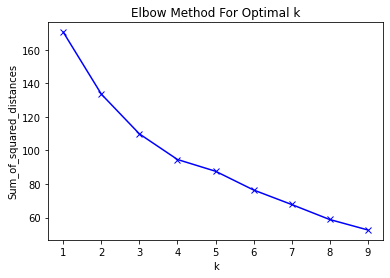

In [27]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
Sum_of_squared_distances = []

K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_vec)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

สร้าง Word Cloud แสดงข้อความในแต่ละ Cluster

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

                                              Content  Cluster
0   zoology branch biology animal kingdom include ...        0
1   although human always interested natural histo...        0
2   animal largely move deal form function adaptat...        1
3   history zoology trace animal kingdom ancient m...        0
4   revolution characterize domestication animal c...        0
5   although concept zoology single coherent field...        0
6   aristotle fourth century bc look animal living...        0
7   computer science computation automation inform...        2
8   algorithm datum structure call heart computer ...        1
9   programming language theory consider approach ...        1
10  since argue computer science classify empirica...        2
11  computer science mathematical discipline argue...        2
12  fundamental concern computer science determine...        2
13  computer science aim synthesize goal orientate...        1
14  chemistry scientific property behavior matter ...  

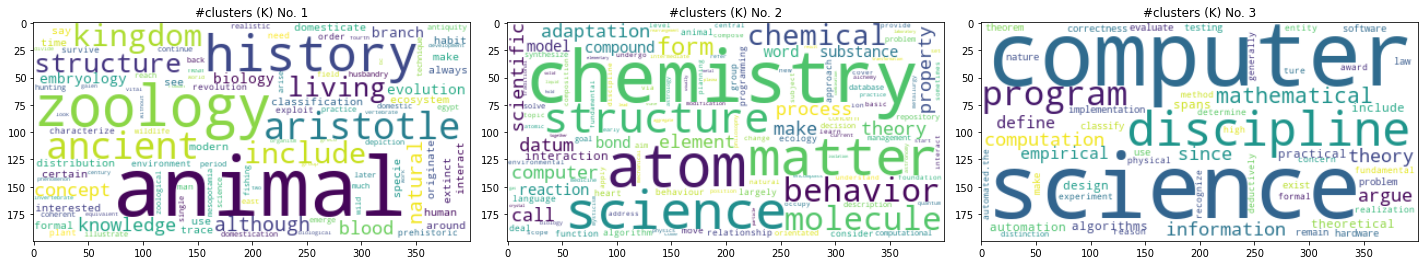

In [32]:
#@title กำหนดจำนวน Cluster
number_of_clusters = 3 #@param {type:"slider", min:2, max:10, step:1}
km = KMeans(n_clusters=number_of_clusters)
# create the clustering
cluster_ids = km.fit_predict(data_vec)
data['Cluster'] = pd.DataFrame(cluster_ids)
print(data)
# Display word cloud of each cluster
plt.figure(figsize = (20,12))
for i in range(1,number_of_clusters+1):
    data_in_cluster = data[data['Cluster'] == i-1]
    frequency_dist = [ ]
    for message in data_in_cluster['Content']:
          words = word_tokenize(message)
          for w in words:
                  frequency_dist.append(w)
    frequency_dist = nltk.FreqDist(frequency_dist)
    # add a subplot
    plt.subplot(1,number_of_clusters,i)
    wcloud = WordCloud( background_color='white').generate_from_frequencies(frequency_dist)
    # automatically adjust subplot params so that the subplot(s) fits in to the figure area
    plt.tight_layout() 
    plt.imshow(wcloud, interpolation='bilinear')
     # setup the labels of the subplot
    plt.title("#clusters (K) No. {}".format(i))

plt.show()